# Project Kickstarter Kaggle

*Camille, Chetan, Nina, Selim*

************************

TODO 
- Chose if we want to use one or both data files
- Finish data exploration
- Define what are the training attributes and that is class
- Clean data (should we hot-encode everything?)
- Chose best models
- Bootstrap
- confidence interval 95%

In [0]:
import pandas as pd
import numpy as np
import csv

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pydot

from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.tree._tree import TREE_LEAF

## Part 1 - Load & EDA

In [0]:
#Access data from Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


ks-projects-201801 -> train

ks-projects-201612 -> test

In [0]:
# Load Kaggle train dataset
df_2018 = pd.read_csv('/content/drive/My Drive/Artificial Intelligence Team/Week 4 - Kickstarter dataset/ks-projects-201801.csv')
df_train, df_test = train_test_split(df_2018, test_size=0.2)
# Load Kaggle test dataset
#df_train_to_explore = pd.read_csv('/content/drive/My Drive/M1/Artificial Intelligence Team/Week 4 - Kickstarter dataset/ks-test.csv')


In [0]:
df_train.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
292934,561028009,Kob Knobs : Corn Holders.,Design,Design,USD,2016-05-26,100000.0,2016-04-26 22:07:06,109.0,failed,3,US,109.0,109.0,100000.0
229754,238073904,Yono: A Collaborative Pixel-Art Project,Digital Art,Art,USD,2012-10-11,6000.0,2012-09-11 23:53:05,3096.0,failed,68,US,3096.0,3096.0,6000.0
288883,539930682,Tokens for Magic: The Gathering - Ixalan,Playing Cards,Games,USD,2017-10-19,500.0,2017-09-19 05:38:48,82.0,failed,6,US,1.0,82.0,500.0
207782,2058916858,"""Running Wild"" Wild Horses Documentary",Film & Video,Film & Video,USD,2013-05-18,7000.0,2013-03-29 22:32:37,260.0,failed,7,US,260.0,260.0,7000.0
28109,1142635672,"A Musical Anthology, Photobook & Wall Calendar",Photobooks,Photography,USD,2017-08-10,5500.0,2017-07-10 22:44:00,40.0,failed,2,US,0.0,40.0,5500.0


In [0]:
df_train.describe(include='all')

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,3.029280e+05,302925,302928,302928,302928,302928,3.029280e+05,302928,3.029280e+05,302928,302928.000000,302928,2.999020e+05,3.029280e+05,3.029280e+05
unique,NaN,300983,159,15,14,3153,NaN,302575,NaN,6,NaN,23,NaN,NaN,NaN
top,NaN,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,NaN,1970-01-01 01:00:00,NaN,failed,NaN,US,NaN,NaN,NaN
freq,NaN,33,17936,50798,236328,563,NaN,3,NaN,158349,NaN,234132,NaN,NaN,NaN
mean,1.074297e+09,NaN,NaN,NaN,NaN,NaN,4.922128e+04,NaN,9.734076e+03,NaN,104.865077,NaN,7.071451e+03,9.107876e+03,4.575300e+04
std,6.189432e+08,NaN,NaN,NaN,NaN,NaN,1.193161e+06,NaN,9.869791e+04,NaN,843.253462,NaN,8.121598e+04,9.355846e+04,1.164302e+06
min,5.971000e+03,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.380573e+08,NaN,NaN,NaN,NaN,NaN,2.000000e+03,NaN,3.000000e+01,NaN,2.000000,NaN,1.655000e+01,3.039250e+01,2.000000e+03
50%,1.074836e+09,NaN,NaN,NaN,NaN,NaN,5.300000e+03,NaN,6.190000e+02,NaN,12.000000,NaN,3.930000e+02,6.210000e+02,5.500000e+03
75%,1.609463e+09,NaN,NaN,NaN,NaN,NaN,1.600000e+04,NaN,4.080000e+03,NaN,56.000000,NaN,3.031000e+03,4.051050e+03,1.559603e+04


## 1.1 Missing values

In [0]:
#Percentage of NaN values for each column 
(df_train.isnull().sum() / len(df_train)) * 100

ID                  0.000000
name                0.000990
category            0.000000
main_category       0.000000
currency            0.000000
deadline            0.000000
goal                0.000000
launched            0.000000
pledged             0.000000
state               0.000000
backers             0.000000
country             0.000000
usd pledged         0.998917
usd_pledged_real    0.000000
usd_goal_real       0.000000
dtype: float64

## 1.2 Exploratory analysis of data set

### 1.2.1 Categories

#### Top 10 categories

In [0]:
total_size = len(df_train)
top_cat = df_train.groupby(['category']).count()['ID'].sort_values(ascending=False)[0:10]
print("Top 10 categories reprensent {0:.1f}% of the dataset.".format((top_cat.sum()/total_size)*100))
top_cat

Top 10 categories reprensent 34.8% of the dataset.


category
Product Design    17936
Documentary       12970
Music             12635
Tabletop Games    11237
Shorts             9869
Video Games        9442
Food               9144
Film & Video       8014
Fiction            7340
Fashion            6795
Name: ID, dtype: int64

### 1.2.2 Main categories

main_category
Film & Video    16.769001
Music           13.722403
Publishing      10.552673
Games            9.291647
Technology       8.625152
Design           7.975493
Art              7.431139
Food             6.478107
Fashion          6.015621
Theater          2.892106
Comics           2.850512
Photography      2.841269
Crafts           2.325305
Journalism       1.248151
Dance            0.981421
Name: ID, dtype: float64

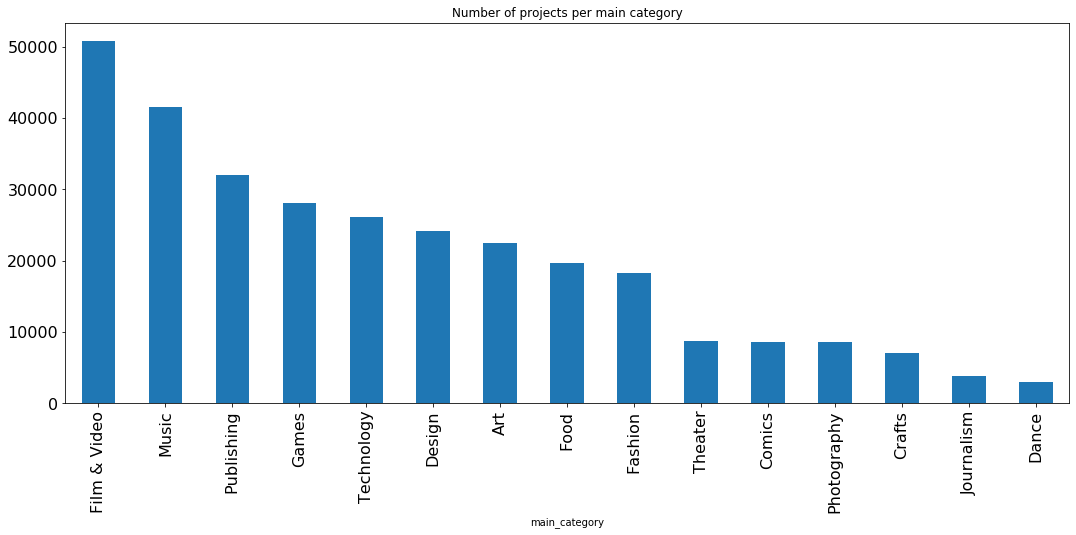

In [0]:
main_cat = df_train.groupby(['main_category']).count()['ID'].sort_values(ascending=False)
main_cat.plot.bar(figsize=(18,7), fontsize=16, title='Number of projects per main category')
(main_cat / total_size) * 100

### 1.2.3 Currencies

currency
USD    78.014578
GBP     9.004120
EUR     4.588879
CAD     3.964969
AUD     2.117005
SEK     0.471729
MXN     0.458195
NZD     0.381279
DKK     0.296440
CHF     0.194106
NOK     0.186513
HKD     0.165056
SGD     0.144919
JPY     0.012214
Name: ID, dtype: float64

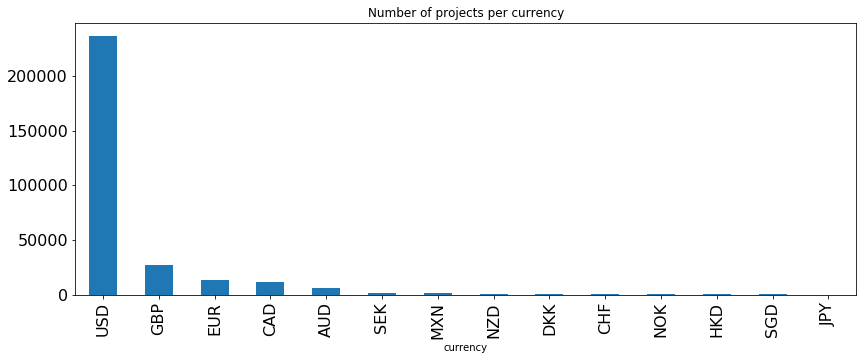

In [0]:
currencies = df_train.groupby(['currency']).count()['ID'].sort_values(ascending=False)
currencies.plot.bar(figsize=(14,5), fontsize=16, title='Number of projects per currency')
(currencies / total_size) * 100

### 1.2.4 Deadlines & Launchs

### 1.2.5 Goals

goal
1.000000e-02      1
1.500000e-01      1
5.000000e-01      1
1.000000e+00    361
1.850000e+00      1
               ... 
7.300000e+07      1
7.500000e+07      1
8.000000e+07      1
9.900000e+07      1
1.000000e+08     30
Name: ID, Length: 7233, dtype: int64

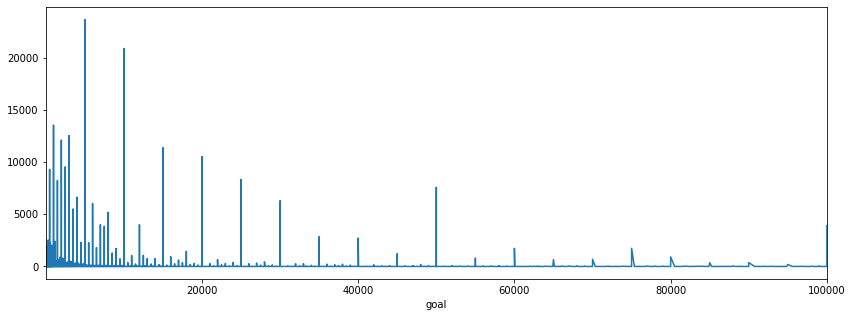

In [0]:
goal = df_train.groupby(['goal']).count()['ID']
goal[0:100000].plot(figsize=(14,5))
goal

### State

state
failed        52.272817
successful    35.306740
canceled      10.244679
undefined      0.936526
live           0.747372
suspended      0.491866
Name: ID, dtype: float64

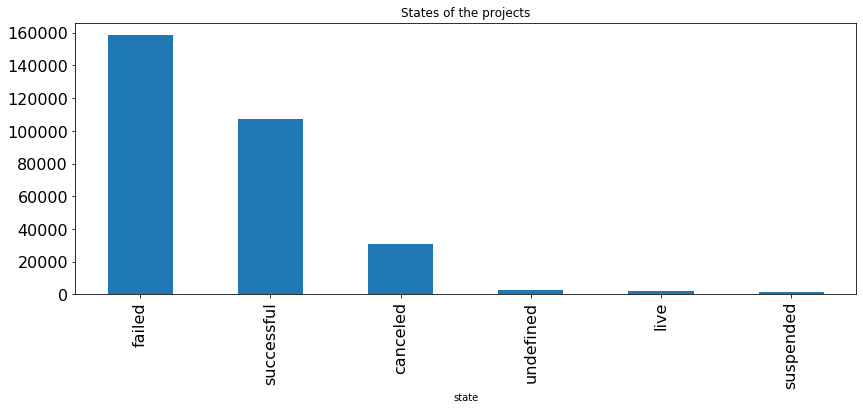

In [0]:
state = df_train.groupby(['state']).count()['ID'].sort_values(ascending=False)
state.plot.bar(figsize=(14,5), fontsize=16, title='States of the projects')
(state / total_size) * 100

### Backers




backers
0         14.728912
1          9.179079
2          6.133471
3          4.264050
4          3.179964
            ...    
78471      0.000330
85581      0.000330
87142      0.000330
91585      0.000330
154926     0.000330
Name: ID, Length: 3585, dtype: float64

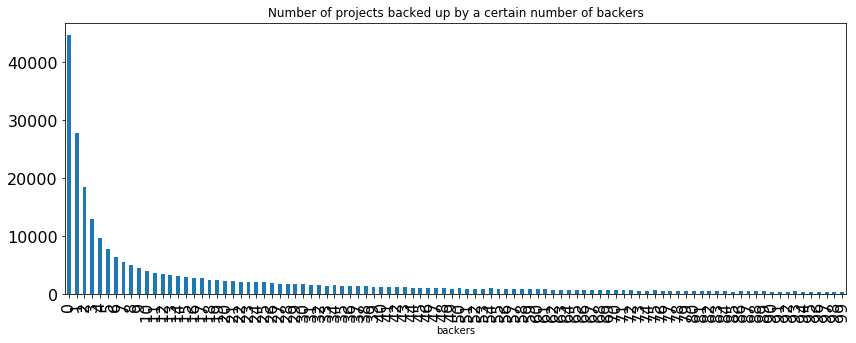

In [0]:
backers = df_train.groupby(['backers']).count()['ID']
backers[0:100].plot.bar(figsize=(14,5), fontsize=16, title='Number of projects backed up by a certain number of backers')
(backers / total_size) * 100

### Country 

country
US      77.289653
GB       8.886930
CA       3.909510
AU       2.089275
DE       1.097621
N,0"     0.998917
FR       0.773121
IT       0.761237
NL       0.756285
ES       0.600143
SE       0.463146
MX       0.458195
NZ       0.373356
DK       0.293469
IE       0.205990
CH       0.193115
NO       0.182552
BE       0.166376
HK       0.165056
AT       0.161424
SG       0.144919
LU       0.017496
JP       0.012214
Name: ID, dtype: float64

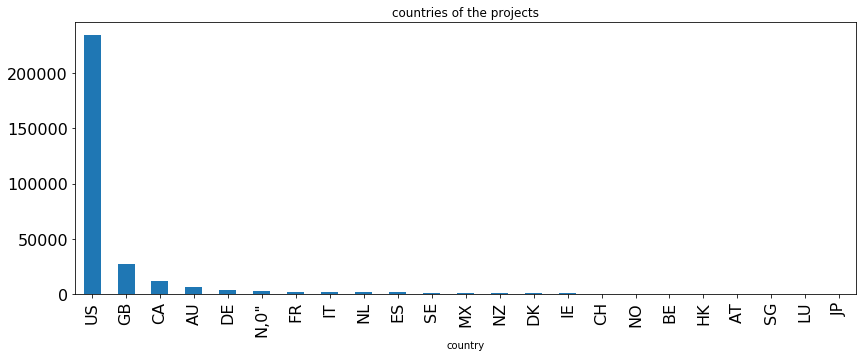

In [0]:
country = df_train.groupby(['country']).count()['ID'].sort_values(ascending=False)
country.plot.bar(figsize=(14,5), fontsize=16, title='countries of the projects')
(country / total_size) * 100

## 1.3 Correlations

In [0]:
df_correl = df_train.corr(method='pearson')
df_correl

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration
ID,1.000000,0.001288,0.000538,0.000493,-0.000316,-0.000018,0.001768,0.001774
goal,0.001288,1.000000,0.006996,0.003994,0.005058,0.004623,0.954977,0.005607
pledged,0.000538,0.006996,1.000000,0.714489,0.858367,0.951924,0.004517,0.001736
backers,0.000493,0.003994,0.714489,1.000000,0.676587,0.750916,0.004525,-0.000454
usd pledged,-0.000316,0.005058,0.858367,0.676587,1.000000,0.909633,0.005702,0.001634
usd_pledged_real,-0.000018,0.004623,0.951924,0.750916,0.909633,1.000000,0.005107,0.001925
usd_goal_real,0.001768,0.954977,0.004517,0.004525,0.005702,0.005107,1.000000,0.005648
duration,0.001774,0.005607,0.001736,-0.000454,0.001634,0.001925,0.005648,1.000000


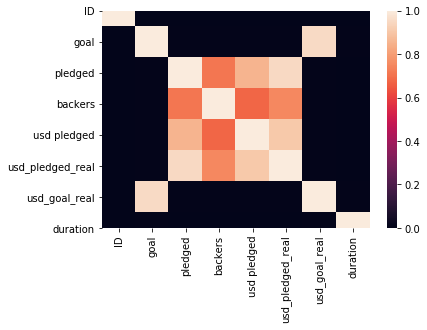

In [0]:
sns.heatmap(df_correl, 
        xticklabels=df_correl.columns,
        yticklabels=df_correl.columns)

In [0]:
df_train.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
duration                     int64
dtype: object

### Cleaning

In [0]:
df_train['launched'] = pd.to_datetime(df_train['launched'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_train['deadline'] = pd.to_datetime(df_train['deadline'])
df_train['duration'] = df_train['deadline'] - df_train['launched']
df_train['duration'] = df_train['duration'].apply(lambda x: x.days).astype(int)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [0]:
duration = df_train.groupby(['duration']).count()['ID'].sort_values()
# duration.plot.bar(figsize=(14,5), fontsize=16, title='duration of the projects')
# (duration / total_size) * 100
# TODO graph

In [0]:
list_main_cat = list(df_train['main_category'].unique())
df_clean = df_train.copy()
df_clean["main_category"] = df_clean["main_category"].apply(lambda x: list_main_cat.index(x))

In [0]:
list_cat = list(df_train['category'].unique())
df_clean["category"] = df_clean["category"].apply(lambda x: list_cat.index(x))

In [0]:
list_currency = list(df_train['currency'].unique())
df_clean["currency"] = df_clean["currency"].apply(lambda x: list_currency.index(x))

In [0]:
list_state = list(df_train['state'].unique())
df_clean["state"] = df_clean["state"].apply(lambda x: list_state.index(x))

In [0]:
list_country = list(df_train['country'].unique())
df_clean["country"] = df_clean["country"].apply(lambda x: list_country.index(x))

In [0]:
df_clean['deadline_weekday'] = df_clean['deadline'].apply(lambda x: x.weekday())
df_clean['deadline_monthday'] = df_clean['deadline'].apply(lambda x: x.day)
df_clean['deadline_month'] = df_clean['deadline'].apply(lambda x: x.month)
df_clean['deadline_year'] = df_clean['deadline'].apply(lambda x: x.year)
del df_clean['deadline']

In [0]:
df_clean['launched_weekday'] = df_clean['launched'].apply(lambda x: x.weekday())
df_clean['launched_monthday'] = df_clean['launched'].apply(lambda x: x.day)
df_clean['launched_month'] = df_clean['launched'].apply(lambda x: x.month)
df_clean['launched_year'] = df_clean['launched'].apply(lambda x: x.year)
df_clean['launched_hour'] = df_clean['launched'].apply(lambda x: x.hour)
del df_clean['launched']

In [0]:
df_clean.dtypes

ID                     int64
name                  object
category               int64
main_category          int64
currency               int64
goal                 float64
pledged              float64
state                  int64
backers                int64
country                int64
usd pledged          float64
usd_pledged_real     float64
usd_goal_real        float64
duration               int64
deadline_weekday       int64
deadline_monthday      int64
deadline_month         int64
deadline_year          int64
launched_weekday       int64
launched_monthday      int64
launched_month         int64
launched_year          int64
launched_hour          int64
dtype: object

## Part 2 - Build Models

In [0]:
def get_sucess(pred, validate_class):
  cf = confusion_matrix(pred, validate_class)
  sucess = (cf[0][0] + cf[1][1]) / (cf[0][0] + cf[1][1] + cf[1][0] + cf[0][1])
  return sucess

def get_accuracy(cf):
  return (cf[0][0] + cf[1][1]) / (cf[0][0] + cf[1][1] + cf[1][0] + cf[0][1])

def get_error_rate(cf):
  return 1 - get_accuracy(cf)

def get_sensitivity(cf):
  return cf[1][1] / (cf[1][1] + cf[1][0])

def get_specificity(cf):
  return cf[0][0] / (cf[0][0] + cf[0][1])

def get_precision(cf):
  return cf[1][1] / (cf[1][1] + cf[0][1])

def get_f1(pred, validate_class):
    cf = confusion_matrix(pred, validate_class)
    return (get_precision(cf) * get_sensitivity(cf)) / (get_precision(cf) + get_sensitivity(cf))

In [0]:
def build_knn(train_attributes, train_class, k=4, algo='auto'):
    knn =  KNeighborsClassifier(n_neighbors=k, algorithm=algo)
    knn.fit(train_attributes, train_class)
    return knn

def build_lda(train_attributes, train_class):
    lda = LinearDiscriminantAnalysis()
    lda.fit(train_attributes, train_class)
    return lda

def build_qda(train_attributes, train_class):
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(train_attributes, train_class)
    return qda

def build_logreg(train_attributes, train_class):
    logreg = LogisticRegression().fit(train_attributes, train_class)
    return logreg

def build_NaiveBayes(train_attributes, train_class):
    gnb = GaussianNB()
    gnb.fit(train_attributes, train_class)
    return gnb

def build_tree(train_attributes, train_class, criterion="gini", max_depth=None, min_samples_split=2):
    arbre = tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split).fit(train_attributes, train_class)
    return arbre

def save_tree(arbre,attributes, name='new_tree.png'):
    tree.export_graphviz(arbre, out_file='tree.dot', feature_names=attributes.columns)
    (graph,) = pydot.graph_from_dot_file('tree.dot')
    graph.write_png(name)

def show_tree(picture):
    plt.figure(figsize = (50, 20))
    img = mpimg.imread(picture)
    imgplot = plt.imshow(img)
    plt.show()

In [0]:
## Part 3 - Apply & optimize models

In [0]:
df_clean.head()

,ID,name,category,main_category,currency,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,deadline_weekday,deadline_monthday,deadline_month,deadline_year,launched_weekday,launched_monthday,launched_month,launched_year,launched_hour
292934,561028009,Kob Knobs : Corn Holders.,0,0,0,100000.0,109.0,0,3,0,109.0,109.0,100000.0,29,3,26,5,2016,1,26,4,2016,22
229754,238073904,Yono: A Collaborative Pixel-Art Project,1,1,0,6000.0,3096.0,0,68,0,3096.0,3096.0,6000.0,29,3,11,10,2012,1,11,9,2012,23
288883,539930682,Tokens for Magic: The Gathering - Ixalan,2,2,0,500.0,82.0,0,6,0,1.0,82.0,500.0,29,3,19,10,2017,1,19,9,2017,5
207782,2058916858,"""Running Wild"" Wild Horses Documentary",3,3,0,7000.0,260.0,0,7,0,260.0,260.0,7000.0,49,5,18,5,2013,4,29,3,2013,22
28109,1142635672,"A Musical Anthology, Photobook & Wall Calendar",4,4,0,5500.0,40.0,0,2,0,0.0,40.0,5500.0,30,3,10,8,2017,0,10,7,2017,22


In [0]:
X = df_clean.copy()
X = X.dropna()
y = X['state']
del X['name']
del X['ID']
del X['pledged']
del X['usd pledged']
del X['usd_pledged_real']

Xy = X.copy()
del Xy['state']
Xy['state'] = X['state']
standardizer = StandardScaler()
standardizer.fit(Xy)
Xy = standardizer.transform(Xy)

for i in range(len(Xy)):
    if Xy[i,-1] < 0:
        Xy[i,-1] = int(0)
    else:
        Xy[i,-1] = int(1)

del X['state']
standardizer = StandardScaler()
standardizer.fit(X)
X = standardizer.transform(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [0]:
print(Xy)

[[-1.29238829 -1.45569709 -0.38169916 ...  0.90723549  1.15598396
   0.        ]
 [-1.26155044 -1.17632292 -0.38169916 ... -1.15835073  1.28572408
   0.        ]
 [-1.23071259 -0.89694874 -0.38169916 ...  1.42363205 -1.04959801
   0.        ]
 ...
 [ 0.58872044 -0.89694874 -0.38169916 ...  0.39083894  0.89650373
   0.        ]
 [-0.42892854 -1.45569709  7.0465404  ... -0.12555762  1.28572408
   0.        ]
 [-0.79898272  0.77929633 -0.38169916 ... -1.15835073 -0.79011778
   0.        ]]


## 3.1 KNN

In [0]:
# knn_mean = []
# knn_std = []
knn_scores = []

for k in range(2,15):
    knn = build_knn(X_train, y_train, k=k)
    knn_result = knn.predict(X_val)
    knn_scores.append(get_sucess(knn_result, y_val))
#     scores = cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=2)
#     knn_mean.append(scores.mean())
#     knn_std.append(scores.std())

In [0]:
print(knn_scores)

In [0]:
# [0.6251434912374685, 0.6287512952354884] k = 2, 3

In [0]:
# plt.errorbar(range(1,2), knn_mean, np.array(knn_std))

In [0]:
## 3.2 LogReg

In [0]:
logreg = build_logreg(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [0]:
logreg_result = logreg.predict(X_val)

In [0]:
logreg_success = get_sucess(logreg_result, y_val)

In [0]:
# configure bootstrap
n_iterations = 5

# run bootstrap
stats = []
for i in range(n_iterations):
    # prepare train and test sets
    boot_train = resample(Xy, replace=True, n_samples=1000)
    boot_test = np.array([x for x in Xy if x.tolist() not in boot_train.tolist()])
    # fit model
    model = LogisticRegression()
    model.fit(boot_train[:,:-1], boot_train[:,-1])
    # evaluate model
    predictions = model.predict(boot_test[:,:-1])
    score = accuracy_score(boot_test[:,-1], predictions)
    print(score)
stats.append(score)
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7014720642355303


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6984409501505521


In [0]:
print(logreg_success)

0.8499717141240807


In [0]:
## 3.3 Linear Discriminant Analysis

In [0]:
lda = build_lda(X_train, y_train)
lda_result = lda.predict(X_val)
lda_success = get_sucess(lda_result, y_val)

In [0]:
print(lda_success)

0.610726643598616


In [0]:
qda = build_qda(X_train, y_train)
qda_result = qda.predict(X_val)
qda_success = get_sucess(qda_result, y_val)

In [0]:
print(qda_success)

0.45812583159095227


In [0]:
gnb = build_NaiveBayes(X_train, y_train)
gnb_result = gnb.predict(X_val)
gnb_success = get_sucess(gnb_result, y_val)

In [0]:
print(gnb_success)

0.46189552182018795


In [0]:
arbre_gini = build_tree(X_train, y_train)
gini_pred = arbre_gini.predict(X_val)
gini_success = get_sucess(gini_pred, y_val)

In [0]:
print(gini_success)

0.8951533977277563


In [0]:
def tree_score(train_attributes, train_class, validate_attributes, validate_class, criterion="gini", max_depth=None, min_samples_split=2):
    arbre_gini = build_tree(train_attributes, train_class,max_depth=max_depth, min_samples_split=min_samples_split)
    gini_pred = arbre_gini.predict(validate_attributes)
    gini_success = get_sucess(gini_pred, validate_class)
    gini_f1 = get_f1(gini_pred, validate_class)
    gini_pred_learn = arbre_gini.predict(train_attributes)
    gini_score_learn = get_sucess(gini_pred_learn, train_class)
    arbre_entropy = build_tree(train_attributes, train_class, criterion="entropy",max_depth=max_depth, min_samples_split=min_samples_split)
    entropy_pred = arbre_entropy.predict(validate_attributes)
    entropy_success = get_sucess(entropy_pred, validate_class)
    entropy_f1 = get_f1(entropy_pred, validate_class)
    entropy_pred_learn = arbre_entropy.predict(train_attributes)
    entropy_score_learn = get_sucess(entropy_pred_learn, train_class)
    return (gini_success, entropy_success, gini_score_learn, entropy_score_learn, gini_f1, entropy_f1)

In [0]:
gini_accuracy = []
gini_accuracy_learn = []
entropy_accuracy = []
entropy_accuracy_learn = []
gini_f1 = []
entropy_f1 = []

for depth in range(1,50):
    gini_score, entropy_score, gini_score_learn, entropy_score_learn, g_f1, e_f1 = tree_score(X_train, y_train, X_val, y_val, max_depth=depth)
    gini_accuracy.append(gini_score)
    gini_accuracy_learn.append(gini_score_learn)
    entropy_accuracy.append(entropy_score)
    entropy_accuracy_learn.append(entropy_score_learn)
    gini_f1.append(g_f1)
    entropy_f1.append(e_f1)

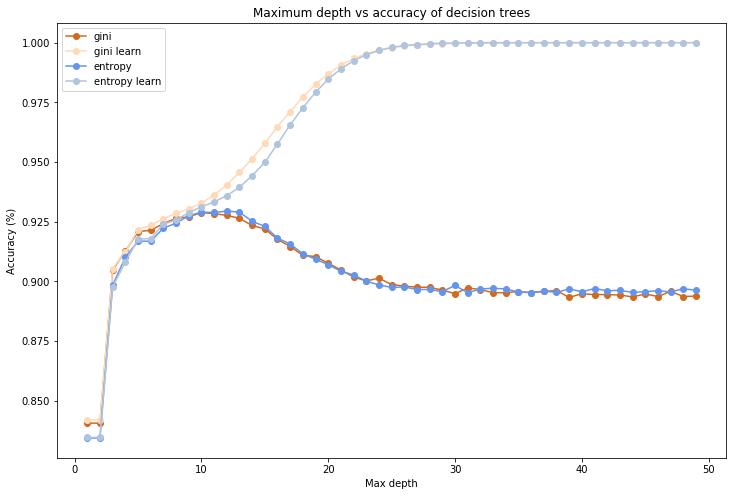

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 50), gini_accuracy, 'o-', label='gini', color='chocolate')
plt.plot(range(1, 50), gini_accuracy_learn, 'o-', label='gini learn', color='peachpuff')
plt.plot(range(1, 50), entropy_accuracy, 'o-', label='entropy', color='cornflowerblue')
plt.plot(range(1, 50), entropy_accuracy_learn, 'o-', label='entropy learn', color='lightsteelblue')
# plt.xticks(np.arange(0, 26, step=4))
plt.xlabel('Max depth')
plt.ylabel('Accuracy (%)')
plt.title('Maximum depth vs accuracy of decision trees')
plt.legend()

In [0]:
gini_accuracy = []
gini_accuracy_learn = []
entropy_accuracy = []
entropy_accuracy_learn = []
gini_f1 = []
entropy_f1 = []

for size in range(2,100):
    gini_score, entropy_score, gini_score_learn, entropy_score_learn, g_f1, e_f1 = tree_score(X_train, y_train, X_val, y_val, min_samples_split=size)
    gini_accuracy.append(gini_score)
    gini_accuracy_learn.append(gini_score_learn)
    entropy_accuracy.append(entropy_score)
    entropy_accuracy_learn.append(entropy_score_learn)
    gini_f1.append(g_f1)
    entropy_f1.append(e_f1)

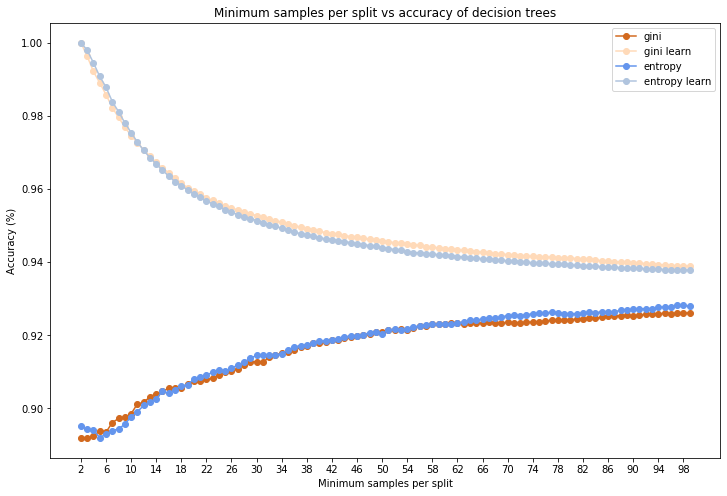

In [0]:
plt.figure(figsize = (12, 8))
plt.plot(range(2, 100), gini_accuracy, 'o-', label='gini', color='chocolate')
plt.plot(range(2, 100), gini_accuracy_learn, 'o-', label='gini learn', color='peachpuff')
plt.plot(range(2, 100), entropy_accuracy, 'o-', label='entropy', color='cornflowerblue')
plt.plot(range(2, 100), entropy_accuracy_learn, 'o-', label='entropy learn', color='lightsteelblue')
plt.xticks(np.arange(2, 100, step=4))
plt.xlabel('Minimum samples per split')
plt.ylabel('Accuracy (%)')
plt.title('Minimum samples per split vs accuracy of decision trees')
plt.legend()

#### Boostraping -> https://machinelearningmastery.com/a-gentle-introduction-to-the-bootstrap-method/

In [0]:
# configure bootstrap
n_iterations = 5

# run bootstrap
stats = []
for i in range(n_iterations):
    # prepare train and test sets
    boot_train = resample(Xy, replace=True, n_samples=1000)
    boot_test = np.array([x for x in Xy if x.tolist() not in boot_train.tolist()])
    # fit model
    model = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=50)
    model.fit(boot_train[:,:-1], boot_train[:,-1])
    # evaluate model
    predictions = model.predict(boot_test[:,:-1])
    score = accuracy_score(boot_test[:,-1], predictions)
    print(score)
stats.append(score)
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower = max(0.0, np.percentile(stats, p))
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))